In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
from scipy.stats import pearsonr
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score



In [2]:
df = pd.read_csv('supersymmetry_dataset.csv')

In [3]:
print(df.head())

   SUSY  lepton 1 pT  lepton 1 eta  lepton 1 phi  lepton 2 pT  lepton 2 eta  \
0   0.0     0.707258      0.613159     -0.763354     1.010814      1.672101   
1   0.0     0.493745     -1.745581     -0.640968     0.576161     -0.514477   
2   1.0     1.305413      0.283820     -1.149154     0.507217     -0.194161   
3   1.0     0.809715     -0.358303     -0.497172     0.787675      0.027419   
4   0.0     0.912852      1.797455     -1.360165     0.496723      1.199644   

   lepton 2 phi  missing energy magnitude  missing energy phi   MET_rel  \
0      1.544314                  0.342641            0.286944  0.514347   
1     -0.629788                  0.585841            0.874038  0.879419   
2      1.313993                  0.659832            0.619593  0.534922   
3      1.201305                  0.790556           -0.861923  0.740287   
4      0.627462                  1.206452           -1.362983  0.033791   

   axial MET       M_R    M_TR_2         R       MT2       S_R  M_Delta_R 

In [4]:
print(df.describe())

               SUSY   lepton 1 pT  lepton 1 eta  lepton 1 phi   lepton 2 pT  \
count  5.000000e+06  5.000000e+06  5.000000e+06  5.000000e+06  5.000000e+06   
mean   4.575654e-01  1.000318e+00  2.192580e-05 -4.994657e-05  9.994304e-01   
std    4.981961e-01  6.873341e-01  1.003107e+00  1.001670e+00  6.542200e-01   
min    0.000000e+00  2.548815e-01 -2.102927e+00 -1.734789e+00  4.285860e-01   
25%    0.000000e+00  5.624837e-01 -7.573512e-01 -8.673567e-01  5.969881e-01   
50%    0.000000e+00  7.915511e-01  1.342127e-04 -3.880155e-04  7.997993e-01   
75%    1.000000e+00  1.204413e+00  7.576486e-01  8.670981e-01  1.162353e+00   
max    1.000000e+00  2.055345e+01  2.101605e+00  1.734839e+00  3.303562e+01   

       lepton 2 eta  lepton 2 phi  missing energy magnitude  \
count  5.000000e+06  5.000000e+06              5.000000e+06   
mean  -3.713140e-05 -1.972243e-05              9.999744e-01   
std    1.002839e+00  1.001631e+00              8.728877e-01   
min   -2.059306e+00 -1.734202e+00   

               SUSY
count  5.000000e+06
mean   4.575654e-01
std    4.981961e-01
min    0.000000e+00
25%    0.000000e+00
50%    0.000000e+00
75%    1.000000e+00
max    1.000000e+00


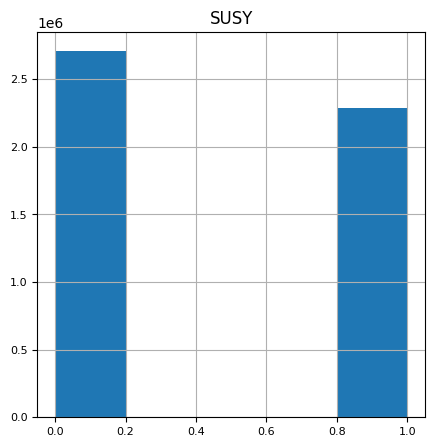

In [5]:
print(df[df.columns[0:1]].describe())
df[df.columns[0:1]].hist(figsize=(5, 5), bins=5, xlabelsize=8, ylabelsize=8);

        lepton 1 pT  lepton 1 eta  lepton 1 phi   lepton 2 pT  lepton 2 eta  \
count  5.000000e+06  5.000000e+06  5.000000e+06  5.000000e+06  5.000000e+06   
mean   1.000318e+00  2.192580e-05 -4.994657e-05  9.994304e-01 -3.713140e-05   
std    6.873341e-01  1.003107e+00  1.001670e+00  6.542200e-01  1.002839e+00   
min    2.548815e-01 -2.102927e+00 -1.734789e+00  4.285860e-01 -2.059306e+00   
25%    5.624837e-01 -7.573512e-01 -8.673567e-01  5.969881e-01 -7.695916e-01   
50%    7.915511e-01  1.342127e-04 -3.880155e-04  7.997993e-01 -3.793710e-04   
75%    1.204413e+00  7.576486e-01  8.670981e-01  1.162353e+00  7.692296e-01   
max    2.055345e+01  2.101605e+00  1.734839e+00  3.303562e+01  2.059721e+00   

       lepton 2 phi  missing energy magnitude  missing energy phi  \
count  5.000000e+06              5.000000e+06        5.000000e+06   
mean  -1.972243e-05              9.999744e-01        3.542352e-05   
std    1.001631e+00              8.728877e-01        1.001654e+00   
min   -1.734

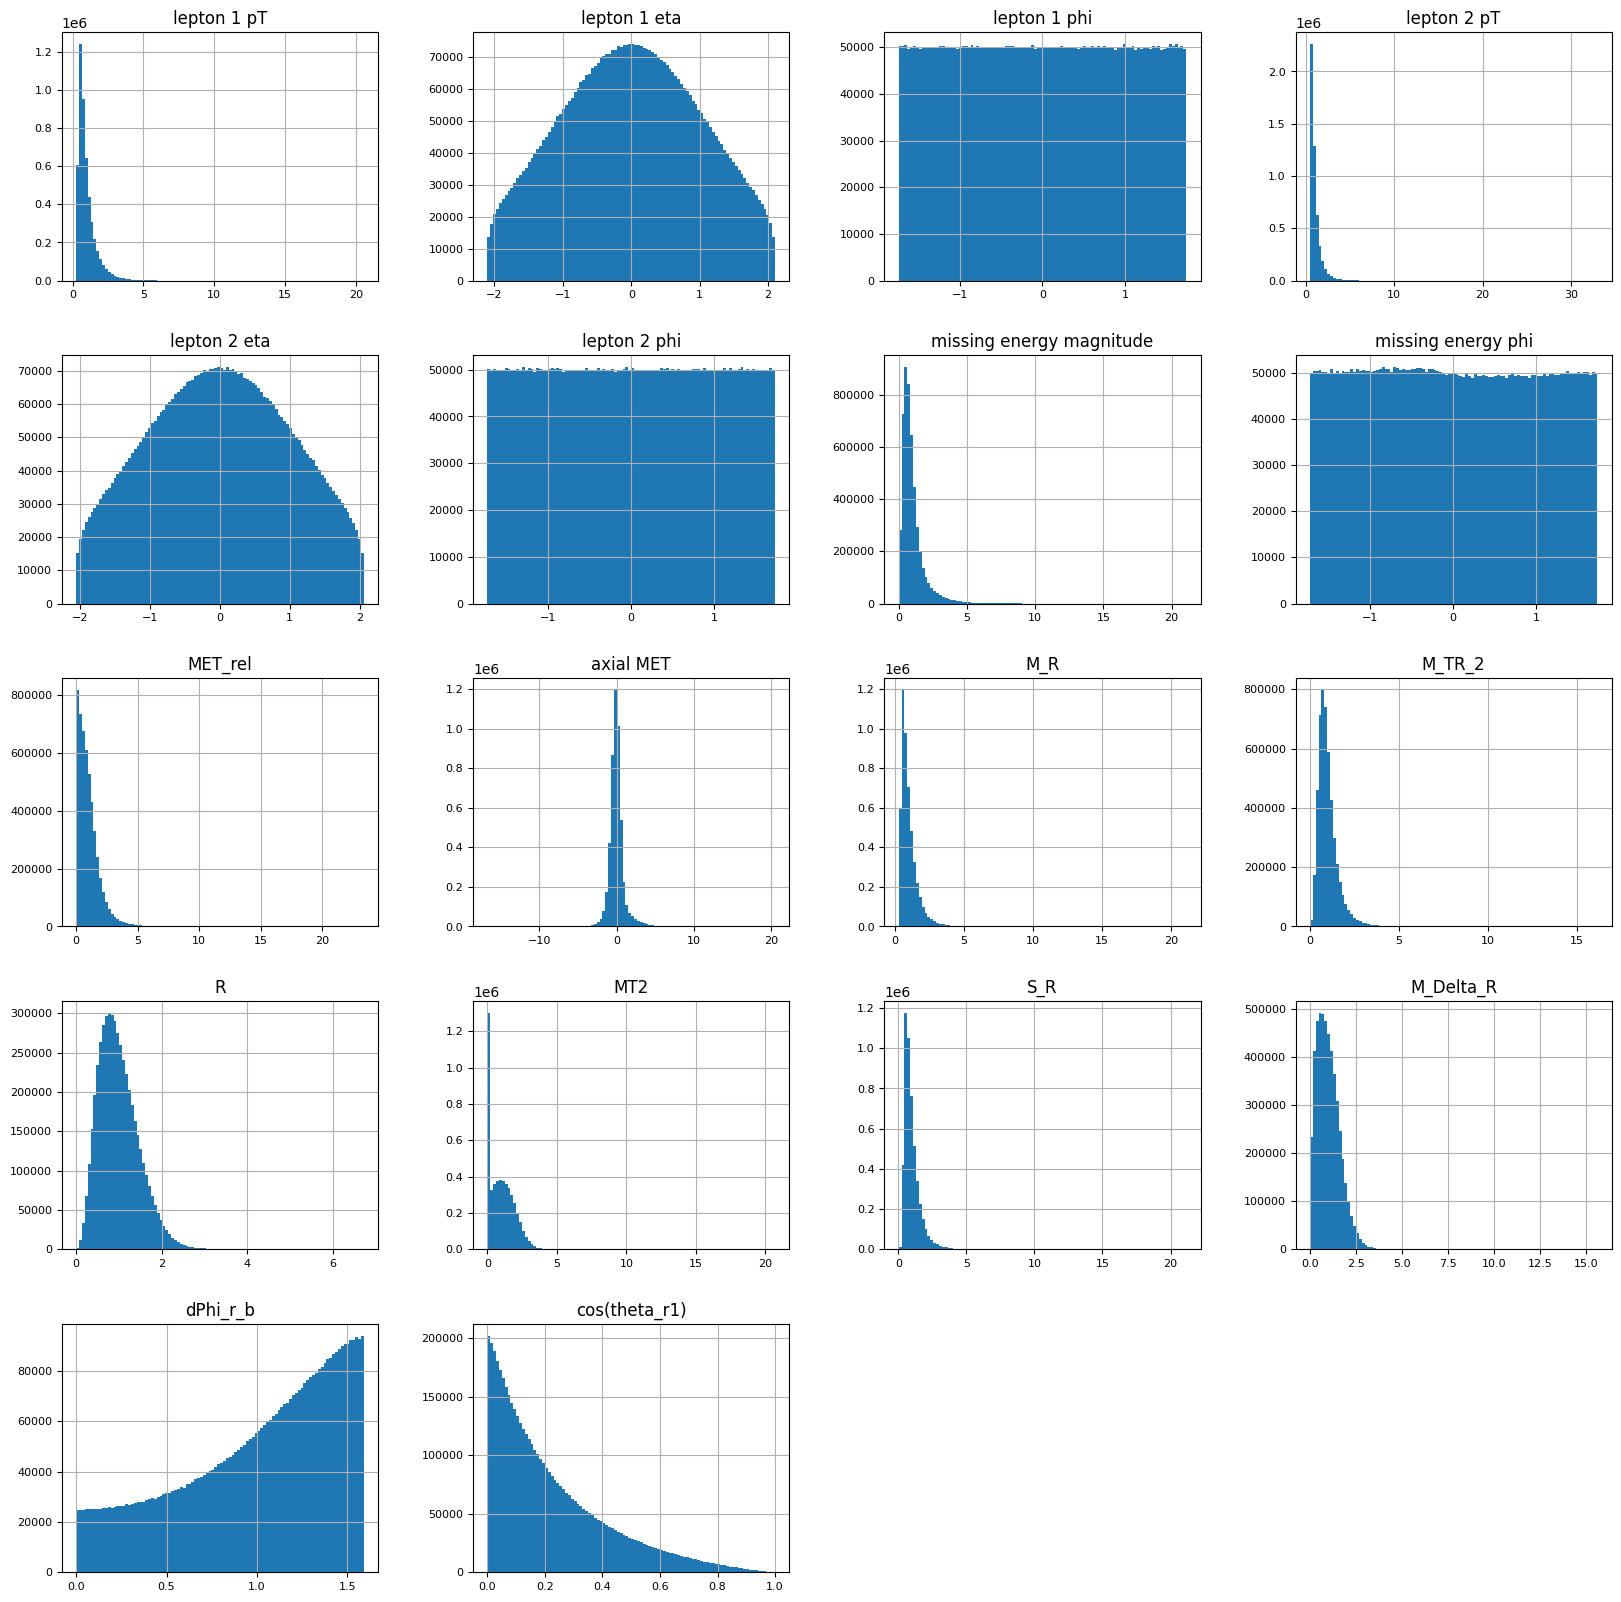

In [6]:
print(df[df.columns[1:19]].describe())
df[df.columns[1:19]].hist(figsize=(20, 20), bins=100, xlabelsize=8, ylabelsize=8);

       lepton 1 phi  lepton 2 phi  missing energy phi
count  5.000000e+06  5.000000e+06        5.000000e+06
mean  -4.994657e-05 -1.972243e-05        3.542352e-05
std    1.001670e+00  1.001631e+00        1.001654e+00
min   -1.734789e+00 -1.734202e+00       -1.727117e+00
25%   -8.673567e-01 -8.683741e-01       -8.661510e-01
50%   -3.880155e-04  2.006134e-04       -9.172642e-03
75%    8.670981e-01  8.674778e-01        8.687620e-01
max    1.734839e+00  1.734686e+00        1.740689e+00


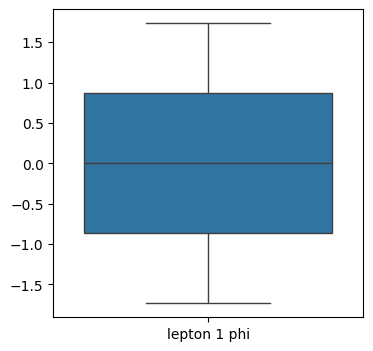

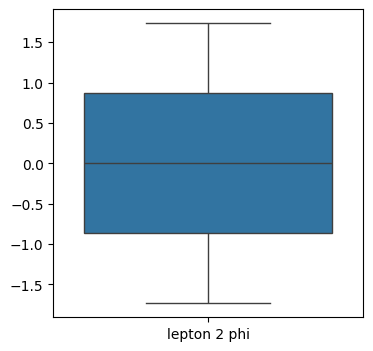

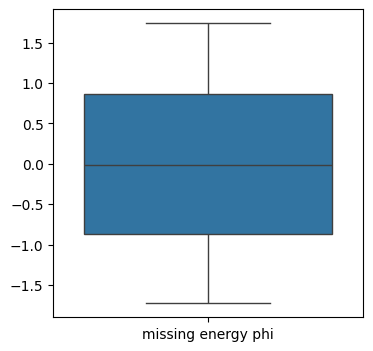

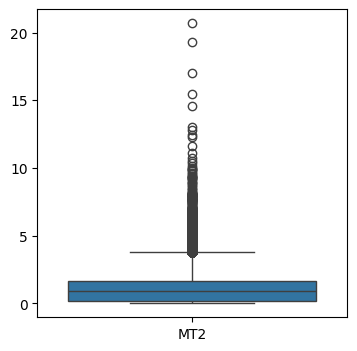

In [7]:
print(df[['lepton 1 phi','lepton 2 phi','missing energy phi']].describe())
for i in ['lepton 1 phi','lepton 2 phi','missing energy phi','MT2']:
  plt.figure(figsize=(4,4))
  sns.boxplot(df[[i]], orient='v')

In [3]:
features = df.drop(columns='SUSY').columns.tolist()
print(features)

['lepton 1 pT', 'lepton 1 eta', 'lepton 1 phi', 'lepton 2 pT', 'lepton 2 eta', 'lepton 2 phi', 'missing energy magnitude', 'missing energy phi', 'MET_rel', 'axial MET', 'M_R', 'M_TR_2', 'R', 'MT2', 'S_R', 'M_Delta_R', 'dPhi_r_b', 'cos(theta_r1)']


In [4]:
def handle_outliers(df, columns):
    for col in columns:
        # Calculate Q1 and Q3
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        # Calculate bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        #Remove outliers
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

In [5]:
df_cleaned=handle_outliers(df,features)
print(df_cleaned)

         SUSY  lepton 1 pT  lepton 1 eta  lepton 1 phi  lepton 2 pT  \
0         0.0     0.707258      0.613159     -0.763354     1.010814   
1         0.0     0.493745     -1.745581     -0.640968     0.576161   
2         1.0     1.305413      0.283820     -1.149154     0.507217   
3         1.0     0.809715     -0.358303     -0.497172     0.787675   
5         1.0     0.360595     -0.576915      0.649141     0.445669   
...       ...          ...           ...           ...          ...   
4999992   0.0     0.645057     -0.636110     -1.470021     1.032389   
4999993   0.0     0.763664     -1.382601      1.098661     1.118695   
4999994   1.0     1.487222     -0.080995     -1.304535     0.949770   
4999995   0.0     0.442663     -1.081974      1.586361     0.743882   
4999999   0.0     0.599682      1.877611     -1.717350     0.997774   

         lepton 2 eta  lepton 2 phi  missing energy magnitude  \
0            1.672101      1.544314                  0.342641   
1           -0.51

In [11]:
print(df_cleaned.describe())

               SUSY   lepton 1 pT  lepton 1 eta  lepton 1 phi   lepton 2 pT  \
count  3.689288e+06  3.689288e+06  3.689288e+06  3.689288e+06  3.689288e+06   
mean   3.445960e-01  7.694133e-01  5.260626e-04 -4.677596e-04  8.298853e-01   
std    4.752364e-01  3.308307e-01  1.032327e+00  1.001813e+00  3.174832e-01   
min    0.000000e+00  2.551196e-01 -2.102927e+00 -1.734789e+00  4.285860e-01   
25%    0.000000e+00  5.228567e-01 -7.954492e-01 -8.679751e-01  5.826005e-01   
50%    0.000000e+00  6.909468e-01  7.666100e-04 -1.137950e-03  7.479447e-01   
75%    1.000000e+00  9.435947e-01  7.969220e-01  8.667723e-01  1.001865e+00   
max    1.000000e+00  2.167287e+00  2.101605e+00  1.734839e+00  1.864064e+00   

       lepton 2 eta  lepton 2 phi  missing energy magnitude  \
count  3.689288e+06  3.689288e+06              3.689288e+06   
mean   2.529384e-04 -3.870635e-05              7.102288e-01   
std    1.025870e+00  1.001310e+00              3.783478e-01   
min   -2.059306e+00 -1.734202e+00   

In [12]:
class_0 = df_cleaned[df_cleaned['SUSY'] == 0]
class_1 = df_cleaned[df_cleaned['SUSY'] == 1]

for feature in features:
    t_stat, p_value = ttest_ind(class_0[feature], class_1[feature])
    print(f'Feature: {feature}, t-statistic: {t_stat}, p-value: {p_value}')

Feature: lepton 1 pT, t-statistic: -821.7006793064694, p-value: 0.0
Feature: lepton 1 eta, t-statistic: -0.07890227151994875, p-value: 0.9371103607443638
Feature: lepton 1 phi, t-statistic: 2.2755493708337013, p-value: 0.022873051612853842
Feature: lepton 2 pT, t-statistic: -352.14508049965787, p-value: 0.0
Feature: lepton 2 eta, t-statistic: -1.2332527390905135, p-value: 0.21748156303528396
Feature: lepton 2 phi, t-statistic: -0.05105143675722287, p-value: 0.9592845361114961
Feature: missing energy magnitude, t-statistic: -646.2451765593416, p-value: 0.0
Feature: missing energy phi, t-statistic: -1.122976903887954, p-value: 0.2614473767355466
Feature: MET_rel, t-statistic: -261.8981378529541, p-value: 0.0
Feature: axial MET, t-statistic: 8.786260867306913, p-value: 1.5468437731708712e-18
Feature: M_R, t-statistic: -544.8980479361032, p-value: 0.0
Feature: M_TR_2, t-statistic: -664.1056151767697, p-value: 0.0
Feature: R, t-statistic: -55.48965612566966, p-value: 0.0
Feature: MT2, t-sta

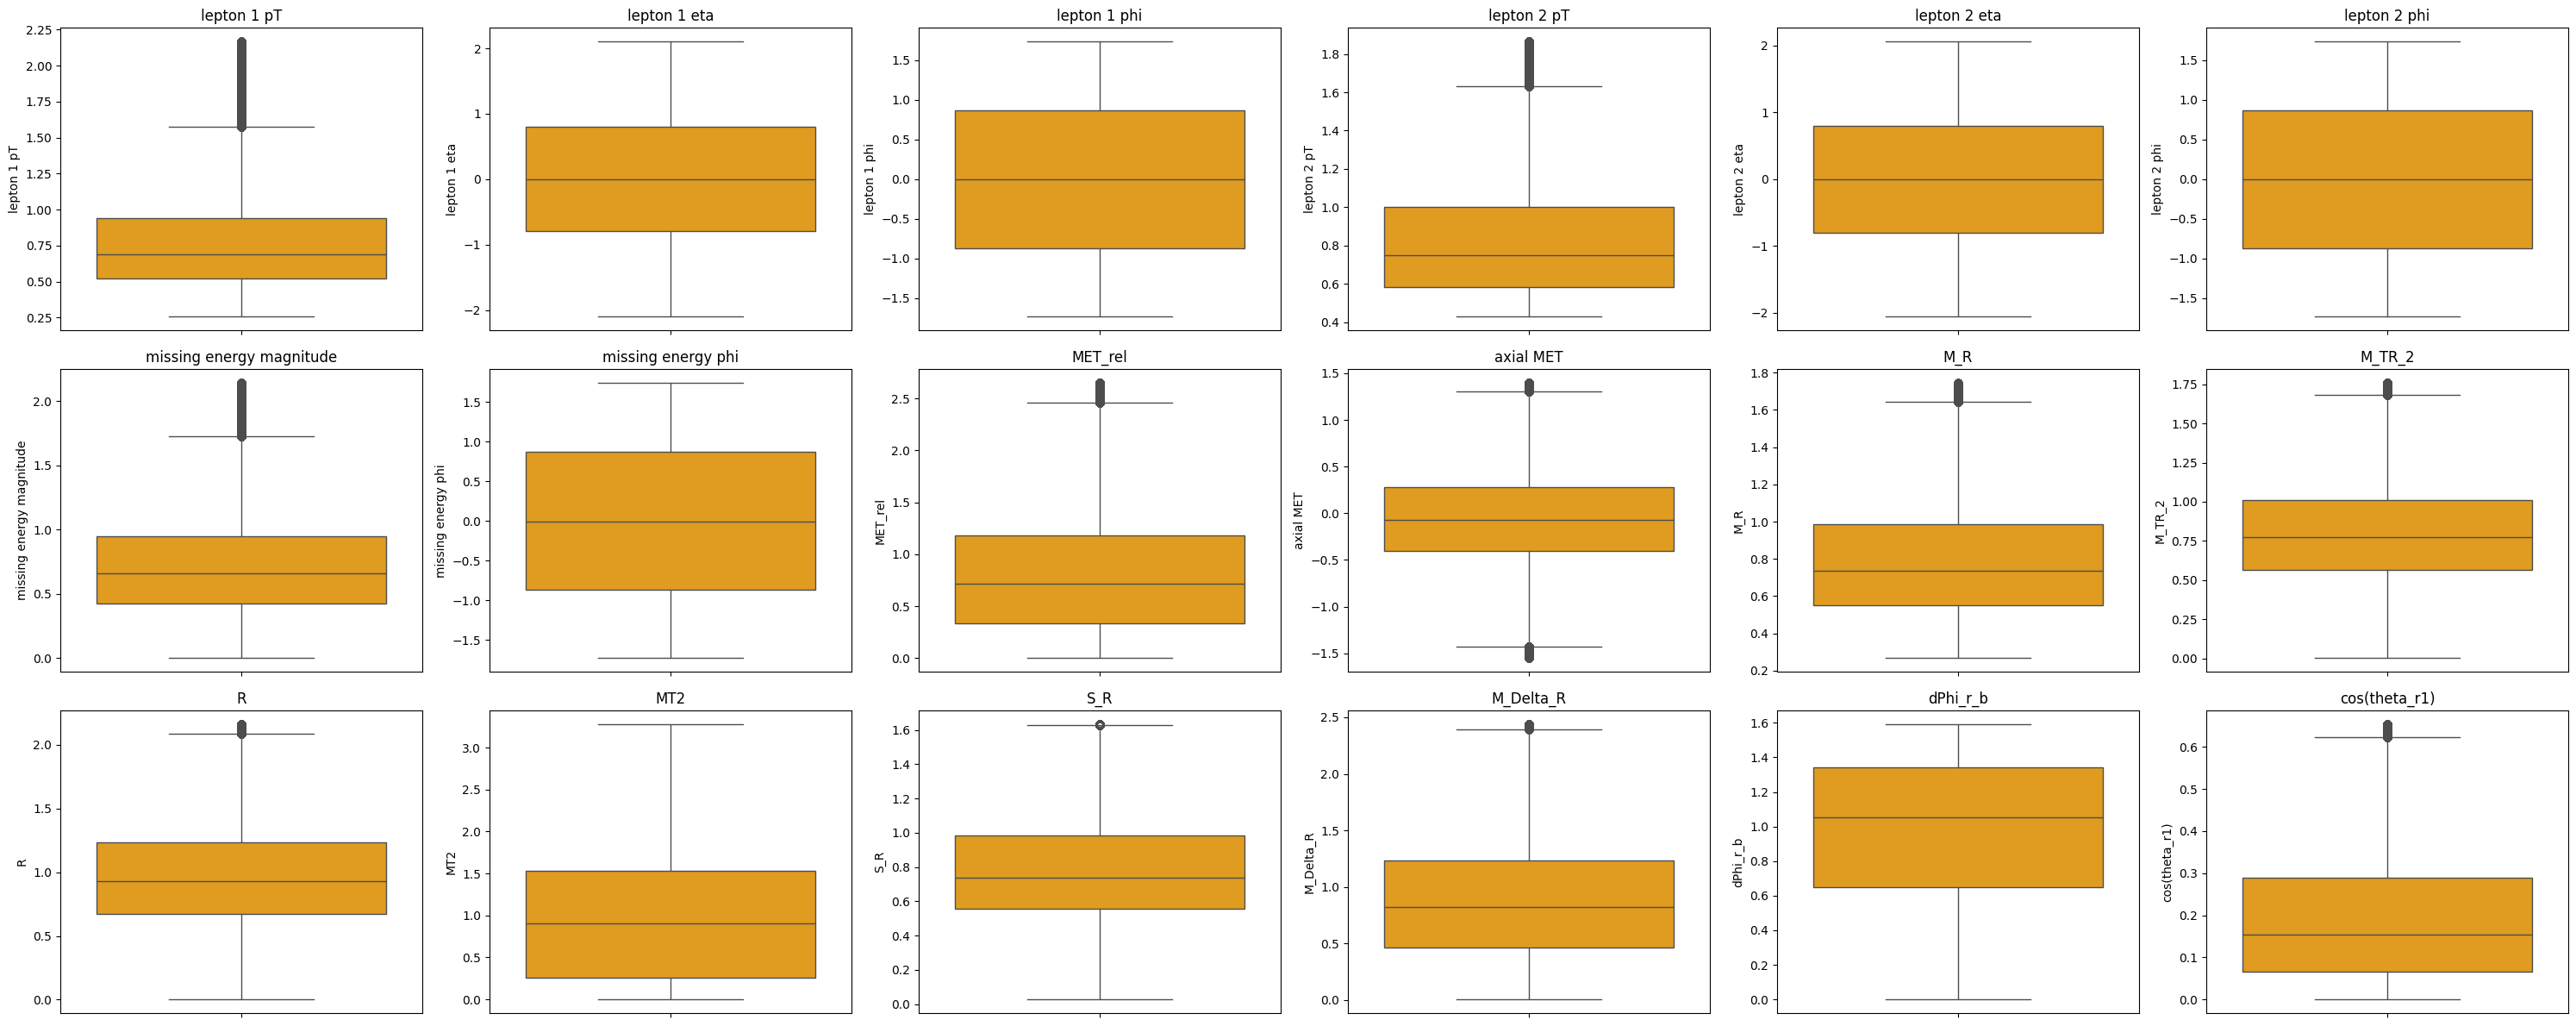

In [13]:
plt.figure(figsize=(30, 12))  # Adjust the figure size as needed

for i, feature in enumerate(df_cleaned.drop(columns='SUSY').columns):
    plt.subplot(3, 6, i + 1)  # Create subplots in a 3x6 grid
    sns.boxplot(y=df_cleaned[feature], orient='v',color='orange')
    plt.title(feature)

plt.tight_layout()  # Adjust spacing between subplots
plt.show()

In [14]:
features_to_check = ['lepton 1 pT',  'M_TR_2', 'missing energy magnitude', 'M_R', 'S_R', 'cos(theta_r1)', 'lepton 2 pT', 'M_Delta_R','MET_rel']
features_to_check2 = ['lepton 1 pT',  'M_TR_2', 'missing energy magnitude', 'M_R', 'S_R', 'cos(theta_r1)', 'lepton 2 pT', 'M_Delta_R','MET_rel']

for feature in features:
    corr_coef, p_value = pearsonr(df_cleaned[feature], df_cleaned['SUSY'])
    print(f"Feature: {feature}")
    print(f"Correlation with label: {corr_coef}, p-value: {p_value}")
    if p_value < 0.05:
        print("Significant correlation with label (reject H0)")
    else:
        print("No significant correlation with label (fail to reject H0)")
    print()

Feature: lepton 1 pT
Correlation with label: 0.3933213230289815, p-value: 0.0
Significant correlation with label (reject H0)

Feature: lepton 1 eta
Correlation with label: 4.1078856335974545e-05, p-value: 0.9371103607446548
No significant correlation with label (fail to reject H0)

Feature: lepton 1 phi
Correlation with label: -0.0011847174785714796, p-value: 0.022873051613719168
Significant correlation with label (reject H0)

Feature: lepton 2 pT
Correlation with label: 0.18033149597987244, p-value: 0.0
Significant correlation with label (reject H0)

Feature: lepton 2 eta
Correlation with label: 0.0006420677214917923, p-value: 0.21748156303815724
No significant correlation with label (fail to reject H0)

Feature: lepton 2 phi
Correlation with label: 2.6578887995553475e-05, p-value: 0.9592845361116081
No significant correlation with label (fail to reject H0)

Feature: missing energy magnitude
Correlation with label: 0.31888879174528195, p-value: 0.0
Significant correlation with label (

In [15]:
# Pairs of features you want to validate for correlation
feature_pairs = [
    ('S_R', 'lepton 1 pT'),
    ('S_R', 'lepton 2 pT'),
    ('S_R', 'M_R'),
    ('MT2', 'M_Delta_R')
]

# Conduct correlation test for each pair
for feature1, feature2 in feature_pairs:
    corr_coef, p_value = pearsonr(df_cleaned[feature1], df_cleaned[feature2])
    print(f"Features: {feature1} & {feature2}")
    print(f"Pearson correlation coefficient: {corr_coef}, p-value: {p_value}")
    if p_value < 0.05:
        print("Significant correlation (reject H0)")
    else:
        print("No significant correlation (fail to reject H0)")
    print()

Features: S_R & lepton 1 pT
Pearson correlation coefficient: 0.7129016157753747, p-value: 0.0
Significant correlation (reject H0)

Features: S_R & lepton 2 pT
Pearson correlation coefficient: 0.668692366176149, p-value: 0.0
Significant correlation (reject H0)

Features: S_R & M_R
Pearson correlation coefficient: 0.9709706033506128, p-value: 0.0
Significant correlation (reject H0)

Features: MT2 & M_Delta_R
Pearson correlation coefficient: 0.9344920200444571, p-value: 0.0
Significant correlation (reject H0)



In [16]:
print(df_cleaned.info())

<class 'pandas.core.frame.DataFrame'>
Index: 3689288 entries, 0 to 4999999
Data columns (total 19 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   SUSY                      float64
 1   lepton 1 pT               float64
 2   lepton 1 eta              float64
 3   lepton 1 phi              float64
 4   lepton 2 pT               float64
 5   lepton 2 eta              float64
 6   lepton 2 phi              float64
 7   missing energy magnitude  float64
 8   missing energy phi        float64
 9   MET_rel                   float64
 10  axial MET                 float64
 11  M_R                       float64
 12  M_TR_2                    float64
 13  R                         float64
 14  MT2                       float64
 15  S_R                       float64
 16  M_Delta_R                 float64
 17  dPhi_r_b                  float64
 18  cos(theta_r1)             float64
dtypes: float64(19)
memory usage: 562.9 MB
None


In [6]:
y = df_cleaned['SUSY']
features_df = df_cleaned.drop(columns='SUSY')

In [7]:
features = features_df.columns
X = features_df[features]

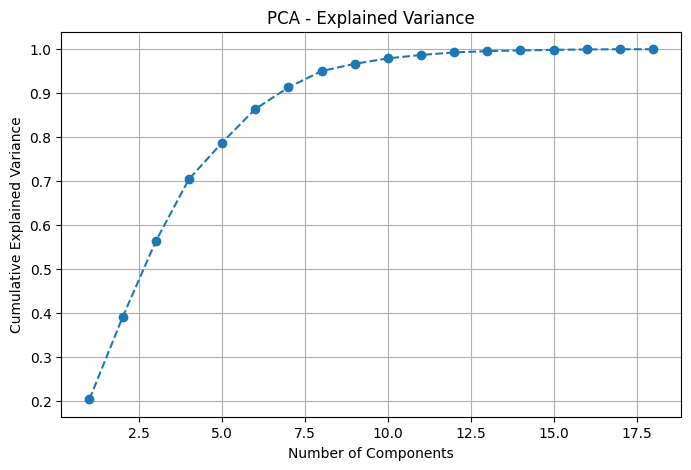

In [9]:
# Fit PCA without specifying n_components
pca_full = PCA()
pca_full.fit(X)

# Cumulative explained variance
cumulative_variance = np.cumsum(pca_full.explained_variance_ratio_)

# Plot
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA - Explained Variance')
plt.grid()
plt.show()

In [11]:
# Select the number of components that explain at least 95% of the variance
threshold = 0.95
n_components = np.argmax(cumulative_variance >= threshold) + 1
print(f"Number of components to retain {threshold*100}% variance: {n_components}")


Number of components to retain 95.0% variance: 8


In [16]:
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X)

# Check explained variance ratio
explained_variance = pca.explained_variance_ratio_
print(f"Explained variance ratio: {explained_variance}")
print(f"Cumulative explained variance: {explained_variance.cumsum()}")

Explained variance ratio: [0.20319167 0.18674741 0.17284512 0.14134141 0.0831787  0.07649934
 0.04926588 0.03713768]
Cumulative explained variance: [0.20319167 0.38993907 0.5627842  0.70412561 0.78730431 0.86380365
 0.91306954 0.95020722]


In [19]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

In [11]:
from sklearn.linear_model import LogisticRegression


# Train logistic regression
lr = LogisticRegression()
lr.fit(X_train, y_train)

# Evaluate
y_pred = lr.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Logistic Regression Accuracy: 0.6990491395363335
              precision    recall  f1-score   support

         0.0       0.72      0.88      0.79    483960
         1.0       0.61      0.35      0.44    253898

    accuracy                           0.70    737858
   macro avg       0.67      0.62      0.62    737858
weighted avg       0.68      0.70      0.67    737858



In [12]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.7522544988331088
              precision    recall  f1-score   support

         0.0       0.77      0.89      0.83    483960
         1.0       0.70      0.49      0.58    253898

    accuracy                           0.75    737858
   macro avg       0.73      0.69      0.70    737858
weighted avg       0.75      0.75      0.74    737858



In [23]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf', probability=True, random_state=42, max_iter=500)
svm.fit(X_train, y_train)

y_pred_svm = svm.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))


c:\Users\Acer\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


SVM Accuracy: 0.6467450376630733
              precision    recall  f1-score   support

         0.0       0.67      0.93      0.77    483960
         1.0       0.45      0.11      0.18    253898

    accuracy                           0.65    737858
   macro avg       0.56      0.52      0.48    737858
weighted avg       0.59      0.65      0.57    737858



In [24]:
X_scaled = (X - X.mean()) / X.std()

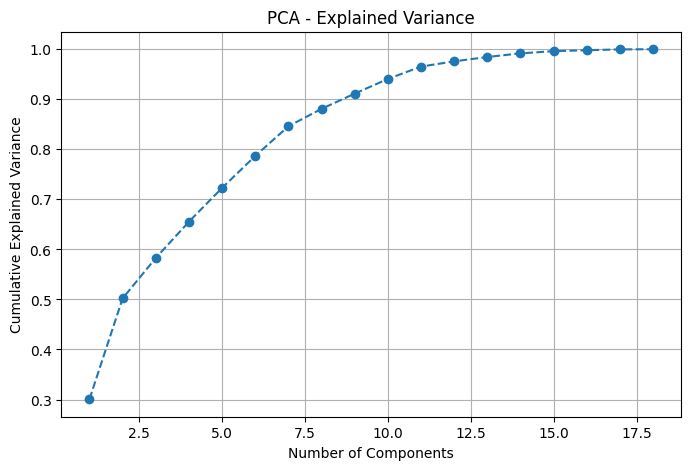

In [27]:
# Fit PCA without specifying n_components
pca_full = PCA()
pca_full.fit(X_scaled)

# Cumulative explained variance
cumulative_variance = np.cumsum(pca_full.explained_variance_ratio_)

# Plot
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA - Explained Variance')
plt.grid()
plt.show()

In [28]:
# Select the number of components that explain at least 95% of the variance
threshold = 0.95
n_components = np.argmax(cumulative_variance >= threshold) + 1
print(f"Number of components to retain {threshold*100}% variance: {n_components}")


Number of components to retain 95.0% variance: 11


In [29]:
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)

# Check explained variance ratio
explained_variance = pca.explained_variance_ratio_
print(f"Explained variance ratio: {explained_variance}")
print(f"Cumulative explained variance: {explained_variance.cumsum()}")

Explained variance ratio: [0.3006247  0.2014868  0.08071989 0.07248921 0.0675249  0.06385412
 0.05928735 0.03488595 0.03039283 0.02932781 0.02471426]
Cumulative explained variance: [0.3006247  0.5021115  0.58283139 0.6553206  0.7228455  0.78669962
 0.84598697 0.88087293 0.91126576 0.94059356 0.96530782]


In [31]:
from sklearn.linear_model import LogisticRegression

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Train logistic regression
lr = LogisticRegression()
lr.fit(X_train, y_train)

# Evaluate
y_pred = lr.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Logistic Regression Accuracy: 0.7543348449159595
              precision    recall  f1-score   support

         0.0       0.77      0.90      0.83    483960
         1.0       0.71      0.48      0.57    253898

    accuracy                           0.75    737858
   macro avg       0.74      0.69      0.70    737858
weighted avg       0.75      0.75      0.74    737858



In [32]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.7722258212284748
              precision    recall  f1-score   support

         0.0       0.79      0.90      0.84    483960
         1.0       0.73      0.54      0.62    253898

    accuracy                           0.77    737858
   macro avg       0.76      0.72      0.73    737858
weighted avg       0.77      0.77      0.76    737858



In [33]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf', probability=True, random_state=42, max_iter=100)
svm.fit(X_train, y_train)

y_pred_svm = svm.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))


c:\Users\Acer\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


SVM Accuracy: 0.6191435208400532
              precision    recall  f1-score   support

         0.0       0.65      0.92      0.76    483960
         1.0       0.23      0.05      0.08    253898

    accuracy                           0.62    737858
   macro avg       0.44      0.48      0.42    737858
weighted avg       0.51      0.62      0.53    737858



In [34]:
features_df.drop(columns=['lepton 1 eta', 'lepton 2 eta', 'lepton 2 phi', 'missing energy phi'], inplace=True)

In [35]:
features_df.drop(columns=['S_R','MT2'], inplace=True)

In [32]:
features_df.describe()

,lepton 1 pT,lepton 1 phi,lepton 2 pT,missing energy magnitude,MET_rel,axial MET,M_R,M_TR_2,R,M_Delta_R,dPhi_r_b,cos(theta_r1)
count,3.689288e+06,3.689288e+06,3.689288e+06,3.689288e+06,3.689288e+06,3.689288e+06,3.689288e+06,3.689288e+06,3.689288e+06,3.689288e+06,3.689288e+06,3.689288e+06
mean,7.694133e-01,-4.677596e-04,8.298853e-01,7.102288e-01,8.055552e-01,-5.055028e-02,7.904735e-01,8.027136e-01,9.728302e-01,8.768657e-01,9.711272e-01,1.942367e-01
std,3.308307e-01,1.001813e+00,3.174832e-01,3.783478e-01,5.723049e-01,5.094810e-01,3.008375e-01,3.239780e-01,4.023403e-01,5.095909e-01,4.377756e-01,1.556202e-01
min,2.551196e-01,-1.734789e+00,4.285860e-01,2.598711e-04,7.693475e-08,-1.552745e+00,2.673070e-01,1.041228e-03,2.048078e-03,4.452858e-03,3.211849e-07,4.172130e-08
25%,5.228567e-01,-8.679751e-01,5.826005e-01,4.233843e-01,3.321443e-01,-4.032286e-01,5.502722e-01,5.631855e-01,6.712454e-01,4.622575e-01,6.484340e-01,6.691158e-02
50%,6.909468e-01,-1.137950e-03,7.479447e-01,6.626076e-01,7.130051e-01,-6.765600e-02,7.343072e-01,7.714665e-01,9.323964e-01,8.242802e-01,1.052649e+00,1.545960e-01
75%,9.435947e-01,8.667723e-01,1.001865e+00,9.455163e-01,1.182577e+00,2.816154e-01,9.874766e-01,1.011426e+00,1.236693e+00,1.235710e+00,1.344608e+00,2.892820e-01
max,2.167287e+00,1.734839e+00,1.864064e+00,2.141607e+00,2.648679e+00,1.397028e+00,1.744734e+00,1.758562e+00,2.160766e+00,2.438975e+00,1.591660e+00,6.540020e-01


In [33]:
features_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3689288 entries, 0 to 4999999
Data columns (total 12 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   lepton 1 pT               float64
 1   lepton 1 phi              float64
 2   lepton 2 pT               float64
 3   missing energy magnitude  float64
 4   MET_rel                   float64
 5   axial MET                 float64
 6   M_R                       float64
 7   M_TR_2                    float64
 8   R                         float64
 9   M_Delta_R                 float64
 10  dPhi_r_b                  float64
 11  cos(theta_r1)             float64
dtypes: float64(12)
memory usage: 365.9 MB


In [36]:
features = features_df.columns
X = features_df[features]

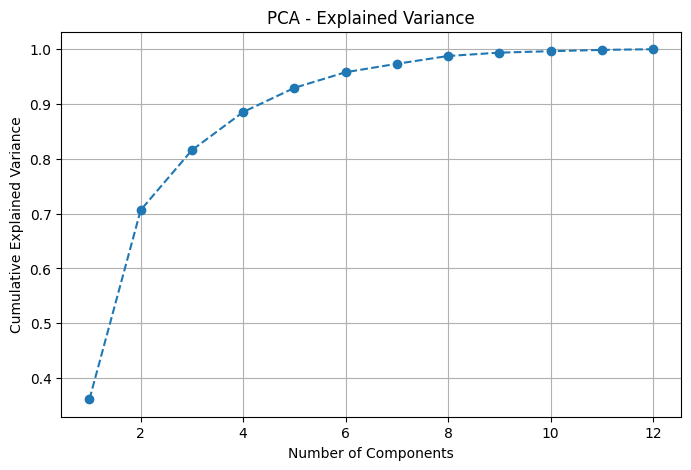

In [37]:
# Fit PCA without specifying n_components
pca_full = PCA()
pca_full.fit(X)

# Cumulative explained variance
cumulative_variance = np.cumsum(pca_full.explained_variance_ratio_)

# Plot
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA - Explained Variance')
plt.grid()
plt.show()

In [38]:
# Select the number of components that explain at least 95% of the variance
threshold = 0.95
n_components = np.argmax(cumulative_variance >= threshold) + 1
print(f"Number of components to retain {threshold*100}% variance: {n_components}")


Number of components to retain 95.0% variance: 6


In [39]:
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X)

# Check explained variance ratio
explained_variance = pca.explained_variance_ratio_
print(f"Explained variance ratio: {explained_variance}")
print(f"Cumulative explained variance: {explained_variance.cumsum()}")

Explained variance ratio: [0.36143214 0.34511018 0.10933892 0.06951907 0.04411692 0.02853522]
Cumulative explained variance: [0.36143214 0.70654232 0.81588124 0.88540031 0.92951723 0.95805245]


In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Train logistic regression
lr = LogisticRegression()
lr.fit(X_train, y_train)

# Evaluate
y_pred = lr.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Logistic Regression Accuracy: 0.7565696922714127
              precision    recall  f1-score   support

         0.0       0.77      0.90      0.83    483960
         1.0       0.72      0.48      0.58    253898

    accuracy                           0.76    737858
   macro avg       0.74      0.69      0.70    737858
weighted avg       0.75      0.76      0.74    737858



In [41]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.761775300938663
              precision    recall  f1-score   support

         0.0       0.78      0.89      0.83    483960
         1.0       0.71      0.52      0.60    253898

    accuracy                           0.76    737858
   macro avg       0.74      0.70      0.72    737858
weighted avg       0.76      0.76      0.75    737858



In [ ]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf', probability=True, random_state=42)
svm.fit(X_train, y_train)

y_pred_svm = svm.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))
